### Introduction

In this project, we aim to perform customer segmentation using the RFM (Recency, Frequency, Monetary) model and KMeans clustering. Customer segmentation is a crucial aspect of marketing strategy, allowing businesses to tailor their marketing efforts to different customer groups based on their purchasing behavior. By segmenting customers, businesses can identify high-value customers, target at-risk customers, and develop strategies to increase customer loyalty and retention.

### Steps Involved

1. **Data Import and Preprocessing**:
   - Import necessary packages and read the dataset.
   - Handle missing values and drop unnecessary columns.
   - Convert Unix timestamp columns to datetime format.

2. **RFM Analysis**:
   - Calculate Recency, Frequency, and Monetary values for each customer.
   - Standardize the RFM data for clustering.

3. **KMeans Clustering**:
   - Apply the KMeans clustering algorithm to the standardized RFM data.
   - Determine the optimal number of clusters using the Elbow method and Silhouette score.
   - Visualize the clusters using 3D scatter plots.

4. **RFM Scoring and Segmentation**:
   - Assign scores to each RFM value and calculate the overall RFM score.
   - Segment customers into different value segments based on their RFM scores.
   - Visualize the distribution of RFM segments.

5. **Customer Segmentation Analysis**:
   - Analyze the characteristics of each customer segment.
   - Visualize the distribution of customer segments using bar charts and treemaps.

### Tools and Libraries

- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations.
- **Matplotlib and Seaborn**: For data visualization.
- **Scikit-learn**: For machine learning algorithms and preprocessing.
- **Plotly**: For interactive visualizations.

### Expected Outcomes

By the end of this project, we will have a clear understanding of the different customer segments within the dataset. We will be able to identify high-value customers, potential loyalists, at-risk customers, and other segments. This segmentation will enable us to develop targeted marketing strategies to enhance customer engagement and retention.

### Conclusion

Customer segmentation using the RFM model and KMeans clustering provides valuable insights into customer behavior. By leveraging these insights, businesses can make data-driven decisions to improve customer satisfaction and drive growth. This project demonstrates the power of data analysis and machine learning in understanding and segmenting customers effectively.

## Import packages and read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#180 columns can be displayed
pd.set_option('display.max_columns', 180)

# Load the data

#iso-8859-1
df = pd.read_csv('data/PBL5recommendationdata.csv', encoding='latin-1')
df.head()

C:\Users\bugra\AppData\Local\Temp\ipykernel_16488\302497664.py:17: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/PBL5recommendationdata.csv', encoding='latin-1')


,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,...,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5284,3758,2310.0,"Bas

In [2]:
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


(None, (4194, 181))

In [3]:
df.drop_duplicates(inplace=True),df.shape


(None, (4194, 181))

In [4]:
df.isnull().sum().sort_values(ascending=False)

Products.freight_cost       4194
Orders.mailing              4194
Orders.gift_message         4194
Orders.registry_id          4194
Products.right_flag         4194
                            ... 
Order_Items.parent             0
Order_Items.product_name       0
Order_Items.qty                0
Order_Items.price              0
Customers.id                   0
Length: 181, dtype: int64

In [5]:
# drop columns with full missing values
df.dropna(axis=1, how='all', inplace=True)
df.shape

(4194, 147)

In [6]:
df.isnull().sum().sort_values(ascending=False)[:60]

Orders.flags                      4193
Products.features_title           4192
Products.shopping_age             4192
Customers.account_id              4191
Orders.weight                     4191
Orders.external_id                4189
Customers.tax_exempt              4189
Products.seo_header               4185
Products.display_packaging        4178
Order_Items.reorder_frequency     4170
Order_Items.attribute_names       4143
Orders.reorder_id                 4112
Orders.partial_ship               4098
Customers.status                  4093
Products.map_price                4072
Products.arm_style                4039
Products.seat_size                4032
Products.rotation_link            3994
Orders.fee_name                   3967
Products.shopping_gender          3956
Orders.fee_amount                 3916
Orders.discount_name              3912
Orders.comments                   3907
Products.product_option           3881
Orders.balance_due                3843
Orders.discount_amount   

In [7]:
threshold = 0.25
df = df.loc[:, df.isnull().mean() < threshold]
df.shape
# drop columns with more than 25% missing values

(4194, 67)

In [8]:
df.isnull().sum().sort_values(ascending=False)[:60]

Products.hcpcs                   906
Orders.payment_code              748
Orders.shipping_carrier          617
Products.display_name            532
Products.qb_edit_sequence        466
Products.quickbooks_id           466
Orders.tax                       457
Orders.shipping_method           443
Orders.payment_id                430
Customers.customer_type          423
Products.google_shopping_id      414
Orders.payment_type              384
Orders.tracking                  376
Orders.shipped_date              346
Products.family_id               325
Products.shopping_flags          277
Products.saved_status            264
Products.template                221
Products.google_shopping_type    215
Products.unit                    209
Products.shipping_width          196
Products.shipping_length         196
Products.shipping_height         196
Orders.shipping                  195
Products.long_description        186
Products.google_shopping_cat     183
Products.seo_title               183
O

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.create_date          4194 non-null   int64  
 4   Customers.last_modified        4194 non-null   int64  
 5   Customers.customer_type        3771 non-null   float64
 6   Orders.id                      4194 non-null   int64  
 7   Orders.customer_id             4194 non-null   int64  
 8   Orders.fname                   4194 non-null   object 
 9   Orders.lname                   4194 non-null   object 
 10  Orders.order_number            4194 non-null   object 
 11  Orders.currency                4194 non-null   object 
 12  Orders.subtotal                4194 non-null   f

In [10]:
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
4130,3669,Evelyn,Mitchell,1463066852,1463066852,NaN,17208,3669,Evelyn,Mitchell,17208,USD,68.78,0.00,9.95,71.85,manual,0|Standard Shipping,6.72826E+11,3.0,1.463067e+09,authorize.net,71.85,8400565539,02136B,1,1463066853,1.463148e+09,1.463148e+09,0.0,19952,17208,16286.0,Galvanic Skin Response - GSR 2 biofeedback unit,1,68.78,52.50,16286.0,0.0,NaN,5.0,8.0,Galvanic Skin Response - GSR 2 biofeedback unit,NaN,75.00,68.78,52.50,1.457981e+09,Fabrication Enterprises Inc.,15-4266,62.0,health-care-products,online:en:US:16286,Physical Therapy > Modalities > Biofeedback,Health & Beauty > Health Care,NaN,NaN,"<p>The small, hand-held and self contained GSR...",Galvanic Skin Response - GSR 2 biofeedback uni...,Galvanic-Skin-Response-GSR-2-biofeedback-unit,EA,NaN,11.0,8.00,3.00,NaN,0.0
1669,1374,Richard,Kleva,1438608265,1456953666,0.0,5319,1374,Richard,Kleva,5319,USD,257.50,0.00,0.00,257.50,manual,-1|Free Shipping,1Z165YY60393847615,3.0,1.438608e+09,authorize.net,257.50,7405828231,09379C,1,1438608404,1.439324e+09,1.438699e+09,0.0,7018,5319,13219.0,"Nitro DLX Euro Style Walker Rollator, Champagne",1,257.50,206.00,13219.0,0.0,sub-product-detail.html,2.0,1.0,Nitro DLX Euro Style Walker Rollator,"Nitro DLX Euro Style Walker Rollator, Champagne",615.16,257.50,206.00,1.463404e+09,Drive Medical,rtl10266ch-hs,62.0,health-care-products,NaN,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000623E-1438048972,1.450467e+09,"<p>If you're seeking a safe, convenient aid to...","Nitro DLX Euro Style Walker Rollator, Champagn...",Nitro-DLX-Euro-Style-Walker-Rollator-Champagne,EA,NaN,41.0,29.50,11.50,RS32,0.0
4037,3580,Germaine,Valentine,1462656297,1462656297,1.0,16843,3580,Germaine,Valentine,16843,USD,96.32,0.00,9.95,106.27,manual,0|Standard Shipping,NaN,3.0,1.462656e+09,authorize.net,106.27,8387494757,01814C,5,1462656443,1.462812e+09,NaN,1.0,19548,16843,2371.0,Suction Cup Grab Bar,1,23.26,16.04,2371.0,0.0,sub-product-detail.html,2.0,1.0,Suction Cup Grab Bar,Suction Cup Grab Bar,25.59,23.26,16.04,1.463404e+09,Drive Medical,rtl13082,62.0,health-care-products,online:en:US:2371,Bathroom & Safety > Bathroom > Grab Bars,Health & Beauty > Health Care,80007502-1438230524,1.450466e+09,"<p>The 12"" suction cup grab bar by Drive Medic...",Suction Cup Grab Bar | Drive Medical - rtl13082,Suction-Cup-Grab-Bar,EA,E0241,14.5,5.88,3.75,BS34,0.0
670,553,Sherwin,Tsai,1419609360,1437763649,0.0,2906,553,Sherwin,Tsai,2906,USD,113.39,7.49,9.95,124.44,fedex,11|Ground,6.87398E+14,3.0,1.419609e+09,NaN,124.44,NaN,NaN,1,1419609360,1.438868e+09,1.419632e+09,0.0,4375,2906,837.0,K1 Basic Wheelchairs,1,113.39,89.99,837.0,3.0,sub-product-detail.html,1.0,3.0,K1 Basic Wheelchairs,"Medlin

In [11]:
# fill with mode for categorical columns

df = df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'O' else x)
# create a df missings and type of columns
missings = pd.DataFrame(df.isnull().sum(), columns=['missing'])
missings['type'] = df.dtypes
missings = missings[missings.missing > 0]
missings
 # create a df missings and type of columns

,missing,type
Customers.customer_type,423,float64
Orders.tax,457,float64
Orders.shipping,195,float64
Orders.payment_status,5,float64
Orders.payment_date,18,float64
Orders.payment_amount,18,float64
Orders.updated_date,23,float64
Orders.shipped_date,346,float64
Orders.customer_type,183,float64
Order_Items.product_id,43,float64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.create_date          4194 non-null   int64  
 4   Customers.last_modified        4194 non-null   int64  
 5   Customers.customer_type        3771 non-null   float64
 6   Orders.id                      4194 non-null   int64  
 7   Orders.customer_id             4194 non-null   int64  
 8   Orders.fname                   4194 non-null   object 
 9   Orders.lname                   4194 non-null   object 
 10  Orders.order_number            4194 non-null   object 
 11  Orders.currency                4194 non-null   object 
 12  Orders.subtotal                4194 non-null   f

In [13]:
# fill with knn for numerical columns, use only numerical columns. 
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df.select_dtypes(include=[np.number]))
df_imputed = pd.DataFrame(df_imputed, columns=df.select_dtypes(include=[np.number]).columns)
# fill df with imputed values
df[df_imputed.columns] = df_imputed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   float64
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.create_date          4194 non-null   float64
 4   Customers.last_modified        4194 non-null   float64
 5   Customers.customer_type        4194 non-null   float64
 6   Orders.id                      4194 non-null   float64
 7   Orders.customer_id             4194 non-null   float64
 8   Orders.fname                   4194 non-null   object 
 9   Orders.lname                   4194 non-null   object 
 10  Orders.order_number            4194 non-null   object 
 11  Orders.currency                4194 non-null   object 
 12  Orders.subtotal                4194 non-null   f

In [14]:
df.isnull().sum().sort_values(ascending=False) > 0 

Customers.id               False
Products.shopping_flags    False
Order_Items.cost           False
Products.id                False
Products.status            False
                           ...  
Orders.shipped_date        False
Orders.customer_type       False
Order_Items.id             False
Order_Items.parent         False
Products.saved_status      False
Length: 67, dtype: bool

In [15]:
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
3904,3445.0,Deborah,Scobee,1.462119e+09,1.462119e+09,0.0,16362.0,3445.0,Deborah,Scobee,16362,USD,164.56,0.0,0.00,164.56,fedex,11|Ground,7.44879E+12,3.0,1.462119e+09,authorize.net,164.56,8366694795,24330,1.0,1.462119e+09,1.462220e+09,1.462217e+09,0.0,19038.0,16362.0,909.0,"Medline wheelchair walker combination, Red, In...",1.0,164.56,131.65,909.0,3.0,sub-product-detail.html,1.0,3.0,"Combination Rollator/Transport Chair,Red,F: 6""...","Medline wheelchair walker combination, Red, In...",230.38,164.56,131.65,1.463163e+09,MEDLINE,MDS808200TRR,62.0,health-care-products,online:en:US:909,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care,800008C9-1434299499,1.450323e+09,<ul><li> Combine the functionality of both a r...,Excel Translator Combination Transport Chair &...,Combination-RollatorTransport-ChairRed,EA,E0143 +E0156,33.00,10.70,31.50,PF05431,3.0
296,282.0,Valentine,Jideofor,1.408076e+09,1.437764e+09,0.0,1354.0,282.0,Valentine,Jideofor,1354,USD,12.44,0.0,9.95,22.39,fedex,11|Ground,7.55594E+13,3.0,1.408076e+09,paypal,22.39,1GL47643S0377015M,02708Z,1.0,1.408076e+09,1.438868e+09,1.408127e+09,0.0,3016.0,1354.0,1782.0,"Isolation Face Masks with Earloops, Yellow",1.0,12.44,7.11,1782.0,0.0,sub-product-detail.html,1.0,3.0,"Isolation Face Masks with Earloops,Yellow","Isolation Face Masks with Earloops, Yellow",17.42,12.44,7.11,1.462370e+09,MEDLINE,NON27120H,62.0,health-care-products,generic/online%3Aen%3AUS%3A1782,OR & Surgery Supplies > Masks & Eyewear,Health & Beauty > Health Care,800080AF-1438893590,1.450324e+09,<ul><li> Basic Isolation masks with elastic ea...,"Isolation Face Masks with Earloops, Yellow | M...",Isolation-Face-Masks-with-EarloopsYellow-2,BX,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,7.75,4.75,4.75,PF07325,0.0
2560,2163.0,Lorel D.,"Ferrin, MBA",1.452492e+09,1.456953e+09,0.0,11401.0,2163.0,Lorel D.,"Ferrin, MBA",11401,USD,52.81,0.0,9.95,57.48,fedex,11|Ground,4.83832E+14,3.0,1.452493e+09,authorize.net,57.48,7882456952,576492,1.0,1.452493e+09,1.454959e+09,1.452583e+09,0.0,13654.0,11401.0,7538.0,"MicroKlenz Antimicrobial Wound Cleansers, 8.00...",1.0,52.81,38.27,7538.0,0.0,sub-product-detail.html,1.0,4.0,"MicroKlenz Antimicrobial Wound Cleansers,8.000 OZ","MicroKlenz Antimicrobial Wound Cleansers, 8.00...",100.45,52.81,38.27,1.463163e+09,MEDLINE,CRR108008,62.0,health-care-products,online:en:US:7538,Pharmacy > Wound Care > Cleansers,Health & Beauty > Health Care,80006F20-1438226634,1.450329e+09,<ul><li> MicroKlenz Antimicrobial Wound Cleans...,"MicroKlenz Antimicrobial Wound Cleansers, 8.00...",MicroKlenz-Antimicrobial-Wound-Cleansers-8000-OZ,CS,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,10.00,8.00,10.00,P

In [16]:
df.shape

(4194, 67)

In [17]:
df.drop(["Orders.fname","Orders.lname"], axis=1, inplace=True) # we have the customer id and Customer name and last name.
df.shape

(4194, 65)

In [18]:
df.drop(["Orders.currency" ] , axis=1, inplace=True)  
# all of them has same currency
df.shape

(4194, 64)

In [19]:
df.drop("Orders.customer_id", axis=1, inplace=True) # we have the customer id

In [20]:
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.order_number,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
4020,3564.0,Herman,Norman,1.462545e+09,1.462545e+09,0.0,16750.0,16750,117.34,0.000,9.95,127.29,manual,0|Standard Shipping,6.87398E+14,3.0,1.462545e+09,authorize.net,119.04,8383651300,07522Z,5.0,1.462545e+09,1.462902e+09,1.462597e+09,0.0,19446.0,16750.0,16479.0,Inflatable Exercise Ball Electric Pump,1.0,18.60,12.00,16479.0,0.0,product-detail.html,5.0,8.0,Inflatable Exercise Ball - Accessory - Electri...,Inflatable Exercise Ball Electric Pump,20.00,18.60,12.00,1.457981e+09,CanDo&reg;,30-1054,62.0,health-care-products,online:en:US:16479,Fitness > Exercise > Inflatable Balls & Rolls,Health & Beauty > Health Care,8000115D-1434302135,1.450357e+09,<p>Electric inflator and deflator pump can be ...,Inflatable Exercise Ball - Electric Pump | Can...,Inflatable-Exercise-Ball-Accessory-Electric-Pump,EA,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,5.000,10.000,7.00,PF21897,0.0
1941,1616.0,Jeffrey,Emerson,1.442946e+09,1.456954e+09,0.0,12994.0,12994,423.63,0.000,9.95,433.58,fedex,11|Ground,1.49935E+13,3.0,1.455992e+09,authorize.net,433.58,8000891753,49644,1.0,1.455992e+09,1.456957e+09,1.456184e+09,0.0,15388.0,12994.0,785.0,"SensiCare Ice Blue Nitrile Exam Gloves, Violet...",1.0,157.81,116.04,785.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Ice Blue Nitrile Exam Gloves,Violet ...","SensiCare Ice Blue Nitrile Exam Gloves, Violet...",220.93,157.81,116.04,1.462370e+09,MEDLINE,MDS6803,62.0,health-care-products,generic/online%3Aen%3AUS%3A785,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800025CA-1434308424,1.450322e+09,<ul><li> SensiCare Ice&reg; nitrile exam glove...,"SensiCare Ice Blue Nitrile Exam Gloves, Violet...",SensiCare-Ice-Blue-Nitrile-Exam-GlovesDark-Blu...,CS,A4927,17.000,12.000,12.00,PF56141,0.0
1271,1043.0,Lee,Ceccotti,1.431802e+09,1.437559e+09,0.0,5177.0,5177,462.37,0.000,0.00,462.37,fedex,11|Ground,1.02633E+14,3.0,1.437857e+09,authorize.net,462.37,7382449514,02000C,1.0,1.437857e+09,1.442117e+09,1.438133e+09,0.0,6861.0,5177.0,153.0,"CURAD Stretch Vinyl Exam Gloves, Medium",2.0,64.35,49.50,153.0,0.0,sub-product-detail.html,1.0,3.0,"CURAD Stretch Vinyl Exam Gloves,Medium","CURAD Stretch Vinyl Exam Gloves, Medium",147.00,64.85,49.50,1.463163e+09,MEDLINE,CUR9225,62.0,health-care-products,generic/online%3Aen%3AUS%3A153,Apparel > Gloves > Nonsterile PF LF Vinyl Exam...,Health & Beauty > Health Care,80000EC8-1434301374,1.450322e+09,<ul><li> CURAD&reg; Non-sterile Powder-Free L...,"Stretch Vinyl Exam Gloves, Medium - CURAD | ME...",CURAD-Stretch-Vinyl-Exam-GlovesMedium,CS,A4927,16.302,10.725,10.14,PF00348,0.0
726,583.0,Randall,Stockard,1.420743e+09,1.437561e+09,0.0,4468.0,4468,60.90,1.188,9.95,70.85,fedex,11|Ground,2.27196E+13,3.0,1.433426e+09,authorize.net,70.85,7234441073,320906,1

In [21]:
df_names = df[["Customers.fname", "Customers.lname"]]
df.drop(["Customers.fname", "Customers.lname"], axis=1, inplace=True)
df.head()

,Customers.id,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.order_number,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
0,797.0,1.426019e+09,1.437764e+09,0.0,3758.0,3758,57.20,0.0,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1.0,1.426019e+09,1.438868e+09,1.426101e+09,0.0,5284.0,3758.0,2310.0,"Basic Rollators, Green",1.0,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,1.463163e+09,MEDLINE,MDS86850EGS,62.0,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000064C-1434298761,1.450325e+09,"<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,E0149 +E0156,24.80,7.50,30.40,PF61071,0.0
1,3.0,1.386089e+09,1.437764e+09,0.0,23.0,23,20.00,0.0,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1.0,1.386090e+09,1.440529e+09,1.386103e+09,0.0,31.0,23.0,177.0,"Urinary Drain Bags,0.000",4.0,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,MEDLINE,DYNC1674H,62.0,health-care-products,online:en:US:1842,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,80008C35-1438901283,1.450322e+09,<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,A4357,8.00,7.00,1.50,PF02132,0.6
2,3.0,1.386089e+09,1.437764e+09,0.0,9531.0,9531,68.78,0.0,9.95,78.73,manual,0|Standard Shipping,6.87398E+14,3.0,1.449604e+09,authorize.net,78.73,0,0,3.0,1.449604e+09,1.450213e+09,1.448226e+09,0.0,11655.0,9531.0,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1.0,68.78,52.50,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,1.463163e+09,MEDLINE,484805,62.0,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800087BB-1438898332,1.450321e+09,<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,13.23,10.04,10.24,PF00342,0.0
3,4.0,1.386780e+09,1.437763e+09,0.0,29.0,29,19.56,0.0,9.95,29.55,fedex,11|Ground,7.96468E+14,3.0,1.386780e+09,authorize.net,29.55,0,02708Z,1.0,1.386780e+09,1.440529e+09,1.386800e+09,0.0,1816.0,29.0,983.0,Basket for 2-Button Walkers,1.0,19.56,12.62,983.0,0.0,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,12.62,1.462595e+09,MEDLINE,MDS86615KH,62.0,health-care-products,online:en:US:1842,"Walking Aids > 

In [22]:
df.drop(["Products.family_id","Products.hcpcs","Products.seo_url", "Products.seo_title", "Products.long_description", "Products.quickbooks_id","Products.google_shopping_cat","Products.google_shopping_type","Products.google_shopping_id","Products.amazon_item_type","Products.shopping_mpn","Products.display_name","Products.name","Products.template","Order_Items.product_name"]
        , axis=1, inplace=True)
df.shape

(4194, 46)

In [23]:
now = pd.to_datetime('2024-09-09')
# pd to datetime : Customers.create_date, Customers.last_modified, Orders.payment_date , Orders.shipped_date , Orders.updated_date , Orders.placed_date , Products.last_modified , Products.qb_edit_sequence 
# check for invalid date values
date_columns = [
    "Customers.create_date", "Customers.last_modified", 
    "Orders.payment_date", "Orders.shipped_date", 
    "Orders.updated_date", "Orders.placed_date", 
    "Products.last_modified", "Products.qb_edit_sequence"
]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], unit='s', errors='coerce')

for col in date_columns:
    num_errors = df[col].isna().sum()
    if num_errors > 0:
        print(f"Column {col} has {num_errors} invalid date values.")



In [24]:
# Yenilik, sıklık ve parasal değerleri hesaplayın
recency = now - df.groupby('Customers.id')['Orders.payment_date'].max()
recency = recency.dt.days
frequency = df.groupby('Customers.id')['Orders.payment_date'].count()
monetary = df.groupby('Customers.id')['Orders.payment_amount'].sum()

rfm_df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

rfm_df.head()

,Recency,Frequency,Monetary
Customers.id,,,
3.0,3197,2,108.720
4.0,3924,1,29.550
5.0,3651,3,139.204
7.0,3908,1,49.140
8.0,3891,1,69.700


In [25]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,3054.0,3267.889980,212.786208,3037.00,3094.00,3184.00,3401.00,3924.00
Frequency,3054.0,1.373281,1.701087,1.00,1.00,1.00,1.00,41.00
Monetary,3054.0,185.063300,604.856600,2.89,39.15,72.28,138.29,15228.95


In [26]:
rfm_df.sample(17).T

Customers.id,2283.0,1810.0,114.0,3634.0,1086.0,475.0,150.0,1891.0,2123.0,699.0,1174.0,669.0,428.0,2124.0,660.0,3344.0,3525.0
Recency,3149.00,3213.00,3792.000,3042.00,3393.0,3573.00,3766.00,3198.00,3105.00,3373.00,3370.00,3506.0,3404.00,3167.00,3510.00,3059.00,3037.00
Frequency,1.00,1.00,1.000,1.00,1.0,1.00,1.00,1.00,3.00,5.00,1.00,1.0,5.00,1.00,1.00,2.00,1.00
Monetary,47.08,17.98,49.572,27.78,37.0,44.39,129.99,212.33,268.82,2783.21,32.99,116.3,328.19,135.99,57.59,191.88,54.18


In [27]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
rfm_df['RecencyScore'] = pd.cut(rfm_df['Recency'], bins=5, labels=recency_scores)
rfm_df['FrequencyScore'] = pd.cut(rfm_df['Frequency'], bins=5, labels=frequency_scores)
rfm_df['MonetaryScore'] = pd.cut(rfm_df['Monetary'], bins=5, labels=monetary_scores)
rfm_df.sample(10).T

Customers.id,3497.0,2532.0,2201.0,3610.0,1160.0,822.0,834.0,2397.0,2518.0,1840.0
Recency,3050.00,3127.00,3160.00,3043.0,3376.00,3464.00,3463.0,3141.00,3128.00,3209.00
Frequency,1.00,2.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00
Monetary,67.14,184.52,53.69,25.7,39.99,129.99,72.9,63.73,60.62,83.57
RecencyScore,5.00,5.00,5.00,5.0,4.00,3.00,3.0,5.00,5.00,5.00
FrequencyScore,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00
MonetaryScore,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00


In [28]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3054 entries, 3.0 to 3736.0
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Recency         3054 non-null   int64   
 1   Frequency       3054 non-null   int64   
 2   Monetary        3054 non-null   float64 
 3   RecencyScore    3054 non-null   category
 4   FrequencyScore  3054 non-null   category
 5   MonetaryScore   3054 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 105.0 KB


In [29]:
rfm_df['RecencyScore'] = rfm_df['RecencyScore'].astype(int)
rfm_df['FrequencyScore'] = rfm_df['FrequencyScore'].astype(int)
rfm_df['MonetaryScore'] = rfm_df['MonetaryScore'].astype(int)

In [30]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3054 entries, 3.0 to 3736.0
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Recency         3054 non-null   int64  
 1   Frequency       3054 non-null   int64  
 2   Monetary        3054 non-null   float64
 3   RecencyScore    3054 non-null   int32  
 4   FrequencyScore  3054 non-null   int32  
 5   MonetaryScore   3054 non-null   int32  
dtypes: float64(1), int32(3), int64(2)
memory usage: 131.2 KB


In [31]:
# Calculate RFM score by combining the individual scores
rfm_df['RFM_Score'] = rfm_df['RecencyScore'] + rfm_df['FrequencyScore'] + rfm_df['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
rfm_df['Value Segment'] = pd.qcut(rfm_df['RFM_Score'], q=3, labels=segment_labels)
rfm_df.sample(10).T

Customers.id,3715.0,2698.0,1510.0,3449.0,511.0,1895.0,1309.0,2910.0,489.0,669.0
Recency,3038,3112,3296,3052,3559,3198,3341,3093,3567,3506
Frequency,1,1,1,1,1,1,2,1,1,1
Monetary,36.69,27.33,118.11,49.14,50.99,56.18,212.88,16.23,50.99,116.3
RecencyScore,5,5,4,5,3,5,4,5,3,3
FrequencyScore,1,1,1,1,1,1,1,1,1,1
MonetaryScore,1,1,1,1,1,1,1,1,1,1
RFM_Score,7,7,6,7,5,7,6,7,5,5
Value Segment,Mid-Value,Mid-Value,Low-Value,Mid-Value,Low-Value,Mid-Value,Low-Value,Mid-Value,Low-Value,Low-Value


In [32]:
# RFM Segment Distribution
import plotly.express as px
segment_counts = rfm_df['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count', 
                          color='Value Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

In [33]:
# add customer id to rfm_df
rfm_df['Customers.id'] = rfm_df.index
rfm_df = rfm_df.reset_index(drop=True)
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,Customers.id
0,3197,2,108.720,5,1,1,7,Mid-Value,3.0
1,3924,1,29.550,1,1,1,3,Low-Value,4.0
2,3651,3,139.204,2,1,1,4,Low-Value,5.0
3,3908,1,49.140,1,1,1,3,Low-Value,7.0
4,3891,1,69.700,1,1,1,3,Low-Value,8.0


In [34]:
# Create a new column for RFM Customer Segments
rfm_df['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
rfm_df.loc[rfm_df['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
rfm_df.loc[(rfm_df['RFM_Score'] >= 6) & (rfm_df['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
rfm_df.loc[(rfm_df['RFM_Score'] >= 5) & (rfm_df['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
rfm_df.loc[(rfm_df['RFM_Score'] >= 4) & (rfm_df['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
rfm_df.loc[(rfm_df['RFM_Score'] >= 3) & (rfm_df['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

In [35]:
rfm_df[['Customers.id', 'RFM Customer Segments']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,...,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027,3028,3029,3030,3031,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053
Customers.id,3.0,4.0,5.0,7.0,8.0,10.0,11.0,12.0,13.0,14.0,15.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,30.0,31.0,32.0,33.0,35.0,37.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,48.0,50.0,52.0,55.0,56.0,57.0,59.0,60.0,61.0,62.0,63.0,65.0,66.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,82.0,84.0,85.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,120.0,121.0,122.0,123.0,124.0,125.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,...,3629.0,3630.0,3631.0,3633.0,3634.0,3636.0,3638.0,3639.0,3640.0,3641.0,3643.0,3644.0,3645.0,3646.0,3647.0,3648.0,3649.0,3650.0,3651.0,3652.0,3653.0,3654.0,3655.0,3656.0,3657.0,3658.0,3659.0,3660.0,3661.0,3662.0,3663.0,3664.0,3666.0,3667.0,3668.0,3669.0,3671.0,3672.0,3673.0,3674.0,3675.0,3677.0,3678.0,3679.0,3680.0,3681.0,3683.0,3684.0,3686.0,3687.0,3688.0,3689.0,3690.0,3691.0,3692.0,3695.0,3696.0,3698.0,3699.0,3700.0,3701.0,3702.0,3703.0,3704.0,3705.0,3706.0,3708.0,3709.0,3710.0,3711.0,3713.0,3714.0,3715.0,3716.0,3717.0,3719.0,3720.0,3721.0,3722.0,3723.0,3724.0,3725.0,3726.0,3728.0,3729.0,3730.0,3732.0,3733.0,3735.0,3736.0
RFM Customer Segments,Potential Loyalists,Lost,Can't Lose,Lost,Lost,Lost,Lost,Lost,At Risk Customers,Lost,Lost,Lost,Lost,At Risk Customers,Lost,Lost,Lost,Can't Lose,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Can't Lose,Lost,Lost,Lost,Lost,Potential Loyalists,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Potential Loyalists,Lost,Lost,Lost,Lost,Lost,Potential Loyalists,Lost,Lost,Lost,Potential Loyalists,Lost,Lost,Lost,Can't Lose,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Lost,Can't Lose,...,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyalists,Potential Loyali

In [36]:
import warnings
warnings.filterwarnings('ignore')
segment_product_counts = rfm_df.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts, 
                                         path=['Value Segment', 'RFM Customer Segments'], 
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
fig_treemap_segment_product.show()

In [37]:
import plotly.colors
import plotly.graph_objects as go

pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = rfm_df['RFM Customer Segments'].value_counts()

# Create a bar chart to compare segment counts
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
                            marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig.show()

In [38]:
# knn clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
rfm_data = rfm_df[['Recency', 'Frequency', 'Monetary']]
rfm_data_scaled = scaler.fit_transform(rfm_data)

# Fit KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(rfm_data_scaled)

# Add the cluster labels to the original data

rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

# Visualize the clusters
import plotly.express as px

fig = px.scatter_3d(rfm_df, x='Recency', y='Frequency', z='Monetary',
                    color='Cluster', symbol='Cluster',
                    title='RFM Clusters')
fig.show()


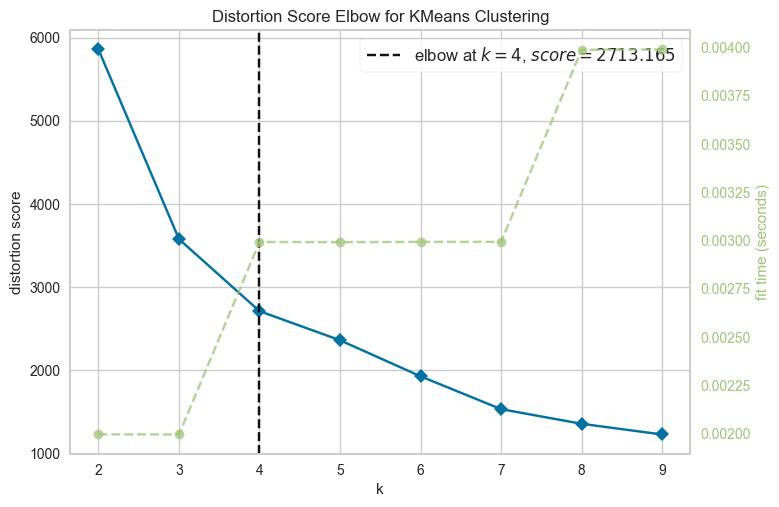

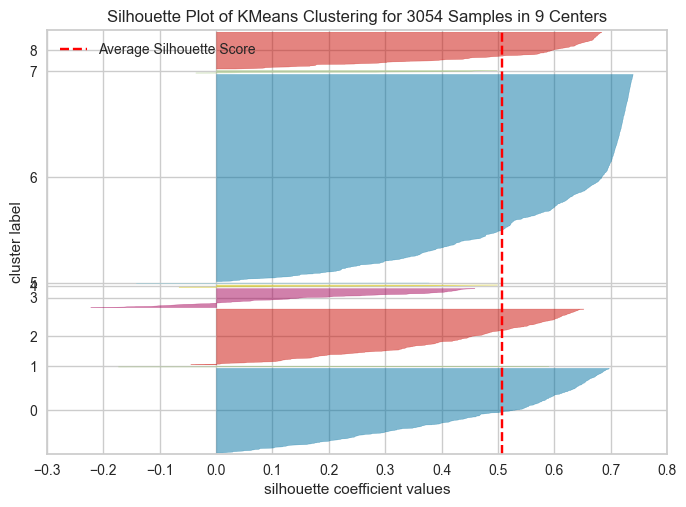

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3054 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans(random_state=1)

# Elbow method
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(rfm_data_scaled)
visualizer.show()

# Silhouette score
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(rfm_data_scaled)
visualizer.show()


In [40]:
# kmeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_data_scaled)

# Add the cluster labels to the original data
rfm_df['Cluster'] = kmeans.labels_

# Visualize the clusters
fig = px.scatter_3d(rfm_df, x='Recency', y='Frequency', z='Monetary',
                    color='Cluster', symbol='Cluster',
                    title='RFM Clusters')
fig.show()


In [41]:
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,Customers.id,RFM Customer Segments,Cluster
0,3197,2,108.720,5,1,1,7,Mid-Value,3.0,Potential Loyalists,3
1,3924,1,29.550,1,1,1,3,Low-Value,4.0,Lost,2
2,3651,3,139.204,2,1,1,4,Low-Value,5.0,Can't Lose,2
3,3908,1,49.140,1,1,1,3,Low-Value,7.0,Lost,2
4,3891,1,69.700,1,1,1,3,Low-Value,8.0,Lost,2
